# Aula 3 - Criação de df e filtragem de dados

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução ao Pandas
- 2) Conceitos de Dataframe e Series
- 3) Axis e slicing: uso de loc/iloc
- 4) Criação e manipulação de DF e SS a partir de dicionário, listas e arrays
- 5) Filtragem de dados e parâmetro inplace
- 6) Criação e manipulação de colunas

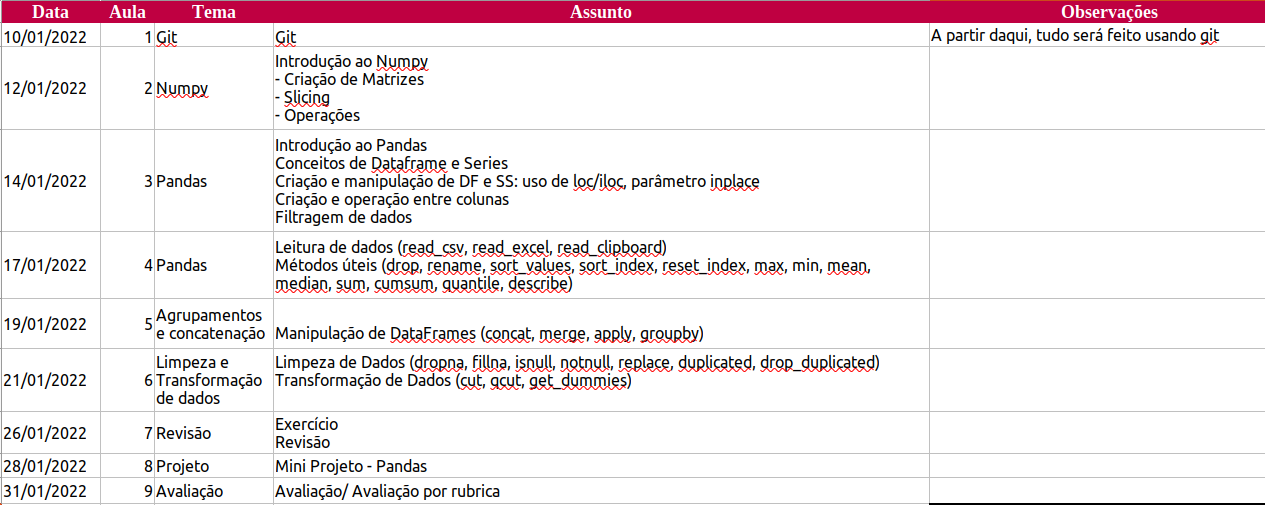
_______

### Objetivos

Apresentar o pandas, frisando sua importância para o processamento de dados e em data science. Apresentar seus principais conceitos (Series, DataFrame) e funcionalidades (leitura de arquivo, filtros, seleção, apply, escrita de arquivos, etc.)

### Habilidades a serem desenvolvidas nessa aula

Ao final da aula o aluno deve:

- Conhecer o pandas, suas vantagens e principais usos;
- Entender o conceito de Series e como elas são construídas;
- Entender o conceito de DataFrame em termos das Series;
- Saber como trabalhar com DataFrames para o processamento de dados:
    - Seleções: uso de loc/iloc;
    - Filtros;
    - Criação de novas colunas.
- Saber como ler e escrever de/em um arquivo com o pandas (csv, excel, etc.).

____
____
____

## 1) Pandas

O pandas é uma das bibliotecas mais usadas em Data Science por ser fácil de usar além de ter alta performance. Ela utiliza dois objetos muito importantes que são as **Series** e os **DataFrames**.

### Instalação
Existem diversas formas de instalar o pandas. A mais simples é instalar o pacote Anaconda (https://www.anaconda.com/distribution/) que já vem com o Python e diversas bibliotecas científicas e ciência de dados instaladas.

Outra forma, caso você já tenha o python instalado mas não o pandas, é o utilizar o gerenciador e pacotes pip, através do comando no seu **terminal**:

`$ pip install pandas`

ou dentro do jupyter

`!pip install pandas`

In [18]:
#!pip install pandas

### Importação
Assim como o `numpy` recebe um alias `np`, o pandas recebe o `pd`.

In [17]:
import pandas as pd

### Series
O objeto fundamental do Pandas são as **Series**.

As Series são originadas de um array unidimensional capaz de guardar qualquer tipo de dado (integers, strings, floating point numbers, Python objects, etc.). A **Series** é um megazord de junção entre listas, arrays e dicionários. E como as listas, as series podem conter dados de vários tipo.

In [23]:
series = pd.Series([1, 2.0, 3 , 'Indiozinhos'])
series

0              1
1            2.0
2              3
3    Indiozinhos
dtype: object

Tipo de uma series:

In [21]:
type(series)

pandas.core.series.Series

Os **valores** (values) de uma series são armazenados como um **array** e podemos acessar os elementos com índices:

In [26]:
series.values

array([1, 2.0, 3, 'Indiozinhos'], dtype=object)

In [28]:
series[3]

'Indiozinhos'

E assim como no numpy, também podemos realizar cálculos com os valores numéricos:

In [34]:
series[0:3].mean()

2.0

Como as listas e dicionários, a series pode ter **elementos de diferentes tipos**. Na primeira posição temos um int enquanto na última temos uma string.

In [22]:
type(series[0])

int

In [24]:
type(series[1])

float

In [25]:
type(series[3])

str

Também podemos criar um **índice** específico para cada elemento e acessá-lo com em um dicionário:

In [30]:
series.index = ['um', 'dois', 'três', 'quatro']
series

um                  1
dois              2.0
três                3
quatro    Indiozinhos
dtype: object

In [31]:
series['quatro']

'Indiozinhos'

 Para entender mais sobre como trabalhar como séries, temos um conteúdo anexado no final desse notebook que você pode olhar.

### DataFrames

Em geral, os dados que armazenamos e utilizamos diariamente estão dispostos em formato de tabelas nos quais as colunas representam atributos dos dados e as linhas representam diferentes observações. <br>
Os **Dataframes** são objetos capazes de armazenar e manipular esse dados dispostos como tabelas, tornando-o muito similar a uma planilha Excel.

<img src="pandas-data-structure.svg"  style="width: 600px" >

As colunas e linhas dos DataFrames são formadas por **Series**. <br>

Antes de conhecer o dataframe do Pandas, vamos ler o arquivo "alunos.csv", da forma como aprendemos na aula de arquivos

In [36]:
import csv

f = open("./data/alunos.csv", "r", encoding="utf-8")

leitor = csv.reader(f, delimiter=';', lineterminator='\n')

planilha = []

for linha in leitor:
    planilha.append(linha)
    
f.close()

planilha

[['RA', 'Nome', 'Frequencia', 'Prova_1', 'Prova_2', 'Prova_3', 'Prova_4'],
 ['110201', 'Antonio Carlos', '20', '6.5', '8.5', '7', '6'],
 ['110212', 'Ana Beatriz', '20', '7', '7', '7', '8'],
 ['110218', 'Carlos Vernes', '17', '7', '7', '7', '7'],
 ['110307', 'Francisco Cunha', '20', '9', '8.5', '8.5', '10'],
 ['110275', 'Sandra Rosa', '15', '6.5', '7.5', '7', '7'],
 ['110281', 'Juliana Arruda', '18', '7.5', '7', '7.5', '8'],
 ['110301', 'Joao Galo', '20', '5', '6.5', '7', '5'],
 ['110263', 'José Valente', '20', '10', '10', '10', '10'],
 ['110271', 'Maria Ferreira', '19', '9.5', '8', '7', '10'],
 ['110236', 'Adriana Tavares', '20', '8', '8', '8', '8']]

Como fizemos na aula, uma vez lido o arquivo, é possível processá-lo de diversas maneiras.

Por exemplo, para obter **a primeira coluna**, isto é, os nomes, fazemos:

In [37]:
[item[1] for item in planilha if item[1]!='Nome']

['Antonio Carlos',
 'Ana Beatriz',
 'Carlos Vernes',
 'Francisco Cunha',
 'Sandra Rosa',
 'Juliana Arruda',
 'Joao Galo',
 'José Valente',
 'Maria Ferreira',
 'Adriana Tavares']

Agora, vamos usar o Pandas e aprender uma forma muito mais fácil de processar dados!

In [78]:
# lendo o arquivo
tabela = pd.read_csv("./data/alunos.csv", sep=";")

tabela

,RA,Nome,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4
0,110201,Antonio Carlos,20,6.5,8.5,7.0,6
1,110212,Ana Beatriz,20,7.0,7.0,7.0,8
2,110218,Carlos Vernes,17,7.0,7.0,7.0,7
3,110307,Francisco Cunha,20,9.0,8.5,8.5,10
4,110275,Sandra Rosa,15,6.5,7.5,7.0,7
5,110281,Juliana Arruda,18,7.5,7.0,7.5,8
6,110301,Joao Galo,20,5.0,6.5,7.0,5
7,110263,José Valente,20,10.0,10.0,10.0,10
8,110271,Maria Ferreira,19,9.5,8.0,7.0,10
9,110236,Adriana Tavares,20,8.0,8.0,8.0,8


### Acessando elementos

Podemos **acessar os valores nas colunas** pelo nome delas:

In [79]:
# acessar coluna "Nome" diretamente
tabela["Nome"]
tabela.Nome

0     Antonio Carlos
1        Ana Beatriz
2      Carlos Vernes
3    Francisco Cunha
4        Sandra Rosa
5     Juliana Arruda
6          Joao Galo
7       José Valente
8     Maria Ferreira
9    Adriana Tavares
Name: Nome, dtype: object

In [80]:
# acessar coluna "Nome" através de uma variável
nome_da_coluna = "Nome"

tabela[nome_da_coluna]

0     Antonio Carlos
1        Ana Beatriz
2      Carlos Vernes
3    Francisco Cunha
4        Sandra Rosa
5     Juliana Arruda
6          Joao Galo
7       José Valente
8     Maria Ferreira
9    Adriana Tavares
Name: Nome, dtype: object

Dá pra **selecionar apenas algumas colunas** do dataframe (ou seja, criando um sub-dataframe):

In [81]:
# pegando apenas a coluna "Nome" e resultado da "Prova_1"
tabela[["Nome", "Prova_1"]]

,Nome,Prova_1
0,Antonio Carlos,6.5
1,Ana Beatriz,7.0
2,Carlos Vernes,7.0
3,Francisco Cunha,9.0
4,Sandra Rosa,6.5
5,Juliana Arruda,7.5
6,Joao Galo,5.0
7,José Valente,10.0
8,Maria Ferreira,9.5
9,Adriana Tavares,8.0


### Acessando elementos

Podemos utilizar o `.loc[indice_linhas, nome_colunas]` para acessar determinas colunas e as linhas através dos índices e nomes das colunas.

In [82]:
# selecionar todas as linhas das colunas ['Nome','Prova_1']
tabela.loc[:, ["Nome", "Prova_1"]]

,Nome,Prova_1
0,Antonio Carlos,6.5
1,Ana Beatriz,7.0
2,Carlos Vernes,7.0
3,Francisco Cunha,9.0
4,Sandra Rosa,6.5
5,Juliana Arruda,7.5
6,Joao Galo,5.0
7,José Valente,10.0
8,Maria Ferreira,9.5
9,Adriana Tavares,8.0


In [83]:
# selecionar linhas 3 à 5 das colunas ['Nome','Prova_1']
tabela.loc[3:5, ["Nome", "Prova_1"]]

,Nome,Prova_1
3,Francisco Cunha,9.0
4,Sandra Rosa,6.5
5,Juliana Arruda,7.5


In [84]:
# selecionar linhas 3,5,9 das colunas ['Nome','Prova_1']
tabela.loc[[3,5,9], ["Nome", "Prova_1"]]

,Nome,Prova_1
3,Francisco Cunha,9.0
5,Juliana Arruda,7.5
9,Adriana Tavares,8.0


In [85]:
# selecionar as linhas das colunas Prova_1 até Prova_4
tabela.loc[:, 'Prova_1':'Prova_4']

,Prova_1,Prova_2,Prova_3,Prova_4
0,6.5,8.5,7.0,6
1,7.0,7.0,7.0,8
2,7.0,7.0,7.0,7
3,9.0,8.5,8.5,10
4,6.5,7.5,7.0,7
5,7.5,7.0,7.5,8
6,5.0,6.5,7.0,5
7,10.0,10.0,10.0,10
8,9.5,8.0,7.0,10
9,8.0,8.0,8.0,8


selecionar apenas uma linha de uma coluna

In [86]:
tabela.loc[9, "Nome"]

'Adriana Tavares'

É possível **alterar valores** da tabela. Para isso, primeiro localizamos o valor a ser alterado com o **.loc**, passando a linha e coluna correspondente, e depois atribuímos o novo valor

In [87]:
tabela.loc[10, "Nome"] = "Joãozinho"
tabela.loc[10, "Frequencia"] = 100

In [88]:
tabela

,RA,Nome,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4
0,110201.0,Antonio Carlos,20.0,6.5,8.5,7.0,6.0
1,110212.0,Ana Beatriz,20.0,7.0,7.0,7.0,8.0
2,110218.0,Carlos Vernes,17.0,7.0,7.0,7.0,7.0
3,110307.0,Francisco Cunha,20.0,9.0,8.5,8.5,10.0
4,110275.0,Sandra Rosa,15.0,6.5,7.5,7.0,7.0
5,110281.0,Juliana Arruda,18.0,7.5,7.0,7.5,8.0
6,110301.0,Joao Galo,20.0,5.0,6.5,7.0,5.0
7,110263.0,José Valente,20.0,10.0,10.0,10.0,10.0
8,110271.0,Maria Ferreira,19.0,9.5,8.0,7.0,10.0
9,110236.0,Adriana Tavares,20.0,8.0,8.0,8.0,8.0


Vamos testar algo diferente:

In [89]:
tabela = tabela.set_index('Nome')
tabela

,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4
Nome,,,,,,
Antonio Carlos,110201.0,20.0,6.5,8.5,7.0,6.0
Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0
Carlos Vernes,110218.0,17.0,7.0,7.0,7.0,7.0
Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0
Sandra Rosa,110275.0,15.0,6.5,7.5,7.0,7.0
Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0
Joao Galo,110301.0,20.0,5.0,6.5,7.0,5.0
José Valente,110263.0,20.0,10.0,10.0,10.0,10.0
Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0


Vamos tentar selecionar as linhas 3 à 5:

In [90]:
tabela.loc[3:5, :]

TypeError: cannot do slice indexing on Index with these indexers [3] of type int

O que aconteceu? <br>
O `.loc` faz o slice considerando o index da matriz e agora o index é o nome dos alunos. 

In [93]:
tabela.loc['Francisco Cunha':'Juliana Arruda', :]

,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4
Nome,,,,,,
Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0
Sandra Rosa,110275.0,15.0,6.5,7.5,7.0,7.0
Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0


E se por algum motivo eu quisesse acessar esse índice pela posição numérica? <br>
Ai precisaremos do **.iloc()**

In [94]:
tabela.iloc[3:5]

,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4
Nome,,,,,,
Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0
Sandra Rosa,110275.0,15.0,6.5,7.5,7.0,7.0


### Seleção através das posições das linhas e colunas
Outra forma de acessarmos dados é através do `.iloc[número_linhas, número_colunas]` utilizando as posições das linhas e colunas

In [95]:
# seleciona uma linha de uma coluna
tabela.iloc[9, 1]

20.0

In [96]:
# seleciona todas as colunas de uma linha
tabela.iloc[9, :]

RA            110236.0
Frequencia        20.0
Prova_1            8.0
Prova_2            8.0
Prova_3            8.0
Prova_4            8.0
Name: Adriana Tavares, dtype: float64

In [97]:
# seleciona um conjunto de linhas sequenciais de um conjunto de colunas sequenciais
tabela.iloc[3:5, 1:5]

,Frequencia,Prova_1,Prova_2,Prova_3
Nome,,,,
Francisco Cunha,20.0,9.0,8.5,8.5
Sandra Rosa,15.0,6.5,7.5,7.0


In [66]:
# seleciona um conjunto de linhas sequenciais de um conjunto de colunas não sequenciais
tabela.iloc[3:5, [1,5]]

,Frequencia,Prova_4
3,20,10.0
4,15,7.0


### .reset_index()
Para resetar o index e voltarmos a ter os valores originais:

In [99]:
tabela.reset_index(inplace=True)
tabela

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,0
0,Antonio Carlos,110201.0,20.0,6.5,8.5,7.0,6.0,0
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,0
2,Carlos Vernes,110218.0,17.0,7.0,7.0,7.0,7.0,0
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,0
4,Sandra Rosa,110275.0,15.0,6.5,7.5,7.0,7.0,0
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,0
6,Joao Galo,110301.0,20.0,5.0,6.5,7.0,5.0,0
7,José Valente,110263.0,20.0,10.0,10.0,10.0,10.0,0
8,Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0,0
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,0


Repare que quando utilizamos o `inplace=True` como um argumento do método nós não precisamos referenciar o dataframe. <br>
Nós podemos utilizar o `inplace=True` em vários métodos do pandas.

### Diferença entre .loc e .iloc
O .loc irá trazer o dado utilizando o índice, não importando se o índice não está ordenado. Já o .iloc irá respeitar a ordem atual dos dados

In [100]:
tabela_copy = tabela.copy()

In [101]:
# vamos bagunçar o índice do df chamado tabela
tabela_copy.index = sorted(tabela.index.values, reverse=True)
tabela_copy.head()

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,0
10,Antonio Carlos,110201.0,20.0,6.5,8.5,7.0,6.0,0
9,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,0
8,Carlos Vernes,110218.0,17.0,7.0,7.0,7.0,7.0,0
7,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,0
6,Sandra Rosa,110275.0,15.0,6.5,7.5,7.0,7.0,0


In [104]:
# .loc traz o índice
tabela_copy.loc[[2,4],:]

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,0
2,Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0,0
4,Joao Galo,110301.0,20.0,5.0,6.5,7.0,5.0,0


In [105]:
# iloc traz a linha
tabela_copy.iloc[[2,4],:]

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,0
8,Carlos Vernes,110218.0,17.0,7.0,7.0,7.0,7.0,0
6,Sandra Rosa,110275.0,15.0,6.5,7.5,7.0,7.0,0


**Exercicio:** Com o df *vendas_diarias* abaixo, entenda como ele foi criado e selecione apenas as quantidades vendidas nos primeiros entre os dias 4 e 6. Com o método `.sum()` ensinado na aula de `numpy`, tente encontrar a soma desses valores.

In [133]:
vendas_diarias = pd.DataFrame([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
                              index=pd.date_range("20220101", periods=10), 
                              columns=['Vendas'])
vendas_diarias

,Vendas
2022-01-01,100
2022-01-02,200
2022-01-03,300
2022-01-04,400
2022-01-05,500
2022-01-06,600
2022-01-07,700
2022-01-08,800
2022-01-09,900
2022-01-10,1000


In [137]:
# Resposta:
vendas_diarias.loc['2022-01-04':'2022-01-06'].sum()

Vendas    1500
dtype: int64

### Criar novas colunas

In [106]:
# cria coluna com valores 1
tabela["cheia_de_um"] = 1

In [107]:
# cria coluna com string
tabela["aaaa"] = "a"

In [108]:
# cria coluna vazia
tabela["vazio"] = ""

In [109]:
tabela

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,0,cheia_de_um,aaaa,vazio
0,Antonio Carlos,110201.0,20.0,6.5,8.5,7.0,6.0,0,1,a,
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,0,1,a,
2,Carlos Vernes,110218.0,17.0,7.0,7.0,7.0,7.0,0,1,a,
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,0,1,a,
4,Sandra Rosa,110275.0,15.0,6.5,7.5,7.0,7.0,0,1,a,
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,0,1,a,
6,Joao Galo,110301.0,20.0,5.0,6.5,7.0,5.0,0,1,a,
7,José Valente,110263.0,20.0,10.0,10.0,10.0,10.0,0,1,a,
8,Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0,0,1,a,
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,0,1,a,


Também é possível **criar uma linha nova** atribuindo valores para todas as colunas:

In [114]:
tabela.loc[10, :] = ["Joãozinho", 100, 10, 4, 6, 7, 2, "bbb", "cheio",'b', 'não vazio']

tabela

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,0,cheia_de_um,aaaa,vazio
0,Antonio Carlos,110201.0,20.0,6.5,8.5,7.0,6.0,0,1,a,
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,0,1,a,
2,Carlos Vernes,110218.0,17.0,7.0,7.0,7.0,7.0,0,1,a,
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,0,1,a,
4,Sandra Rosa,110275.0,15.0,6.5,7.5,7.0,7.0,0,1,a,
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,0,1,a,
6,Joao Galo,110301.0,20.0,5.0,6.5,7.0,5.0,0,1,a,
7,José Valente,110263.0,20.0,10.0,10.0,10.0,10.0,0,1,a,
8,Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0,0,1,a,
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,0,1,a,


Se você usar o index de uma linha que já existe irá substituí-la.

Podemos fazer **operações entre os valores das colunas**, e criar com isso novas colunas!

In [138]:
# calculando a média usando as colunas Prova_1, Prova_2, Prova_3 e Prova_4
tabela["média"] = (tabela["Prova_1"] + tabela["Prova_2"] + 
                   tabela["Prova_3"] + tabela["Prova_4"])/4

Também há alguns métodos prontos que facilitam a utilização:

In [139]:
# calculando a media com o método .mean(axis=1)
tabela["media_2"] = tabela[["Prova_1", "Prova_2", "Prova_3", "Prova_4"]].mean(axis=1)

tabela

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,0,cheia_de_um,aaaa,vazio,média,media_2
0,Antonio Carlos,110201.0,20.0,6.5,8.5,7.0,6.0,0,1,a,,7.0,7.000
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,0,1,a,,7.25,7.250
2,Carlos Vernes,110218.0,17.0,7.0,7.0,7.0,7.0,0,1,a,,7.0,7.000
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,0,1,a,,9.0,9.000
4,Sandra Rosa,110275.0,15.0,6.5,7.5,7.0,7.0,0,1,a,,7.0,7.000
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,0,1,a,,7.5,7.500
6,Joao Galo,110301.0,20.0,5.0,6.5,7.0,5.0,0,1,a,,5.875,5.875
7,José Valente,110263.0,20.0,10.0,10.0,10.0,10.0,0,1,a,,10.0,10.000
8,Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0,0,1,a,,8.625,8.625
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,0,1,a,,8.0,8.000


Naturalmente, o resultado é o mesmo!

### Métodos:

O Pandas possui diversos métodos que podem ser utilizados nessa estrutura.
Abaixo estão alguns métodos que essa estrutura de dados possui e facilitam alguns cálculos e análises:
 

| Método      | Descrição     |
| ----------- | -----------   |
| sum         | soma          |
| mean        | média         |
| std         | desvio padrão |
| mode        | moda          |
| max         | valor máximo  |
| min         | valor mínimo  |
| idxmax      | primeiro índice com valor máximo |
| idxmin      | primeiro índice com valor mínimo |
| value_counts | contagem de valores |
| describe    | estatísticas básicas |


Na próxima aula veremos mais alguns.

<br>

**Exercício:** Seguindo e exemplo da aula anterior e o que foi visto na aula de numpy, encontre a menor nota de cada prova e a menor nota por aluno.

In [85]:
# Encontre a menor nota de cada aluno
tabela[["Prova_1", "Prova_2", "Prova_3", "Prova_4"]].min(axis=1)

0      8.5
1      8.0
2      7.0
3     10.0
4      7.5
5      8.0
6      7.0
7     10.0
8     10.0
9      8.0
10    10.0
dtype: float64

In [86]:
# Encontre a menor nota de cada prova (menor valor para prova_1, para prova_2 ...)
tabela[["Prova_1", "Prova_2", "Prova_3", "Prova_4"]].max(axis=0)

Prova_1    10.0
Prova_2    10.0
Prova_3    10.0
Prova_4    10.0
dtype: float64

### Filtros

Podemos **fazer filtros** muito facilmente

Basta explicitarmos **condições sobre os valores das colunas**, e utilizar isso como indexador do dataframe!

In [140]:
# retorna o sub-dataframe que contém valores maiores que 7 na coluna "média"
# ou seja, é um filtro que utiliza a coluna "média"!

tabela[tabela["média"] > 7]

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,0,cheia_de_um,aaaa,vazio,média,media_2
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,0,1,a,,7.25,7.250
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,0,1,a,,9.0,9.000
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,0,1,a,,7.5,7.500
7,José Valente,110263.0,20.0,10.0,10.0,10.0,10.0,0,1,a,,10.0,10.000
8,Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0,0,1,a,,8.625,8.625
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,0,1,a,,8.0,8.000


Se quisermos fazer filtros mais complexos (filtros compostos, em mais de uma coluna), podemos fazer **conjunções entre filtros**, utilizando os **operadores lógicos de conjunção**.

Obs.: temos os seguintes operadores lógicos:

- &     - corresponde ao "and"
- |     - corresponde ao "or"
- ~     - corresponde ao "not"

In [141]:
# filtar tabela para média > 7 e frequencia >= 20
tabela[(tabela["média"] > 7) & (tabela["Frequencia"] >= 20)]

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,0,cheia_de_um,aaaa,vazio,média,media_2
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,0,1,a,,7.25,7.25
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,0,1,a,,9.0,9.00
7,José Valente,110263.0,20.0,10.0,10.0,10.0,10.0,0,1,a,,10.0,10.00
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,0,1,a,,8.0,8.00


In [142]:
# filtar tabela para média > 7 e frequencia >= 20
tabela[(tabela["média"] > 7) | (tabela["Frequencia"] >= 20)]

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,0,cheia_de_um,aaaa,vazio,média,media_2
0,Antonio Carlos,110201.0,20.0,6.5,8.5,7.0,6.0,0,1,a,,7.0,7.000
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,0,1,a,,7.25,7.250
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,0,1,a,,9.0,9.000
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,0,1,a,,7.5,7.500
6,Joao Galo,110301.0,20.0,5.0,6.5,7.0,5.0,0,1,a,,5.875,5.875
7,José Valente,110263.0,20.0,10.0,10.0,10.0,10.0,0,1,a,,10.0,10.000
8,Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0,0,1,a,,8.625,8.625
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,0,1,a,,8.0,8.000


In [143]:
# pegando somente a coluna "média" dos alunos que tiveram nota igual na prova 1 e na prova 4
tabela[tabela["Prova_4"] == tabela["Prova_1"]]["média"]

2      7.0
6    5.875
7     10.0
9      8.0
Name: média, dtype: object

In [144]:
# calculando a média de todos os alunos que tiveram nota igual na prova 1 e na prova 4
tabela[tabela["Prova_4"] == tabela["Prova_1"]]["média"].mean()

7.71875

In [145]:
# Podemos criar um novo df diretamento do filtro
prova_4 = tabela[tabela['Prova_4']>=7]
prova_4

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,0,cheia_de_um,aaaa,vazio,média,media_2
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,0,1,a,,7.25,7.250
2,Carlos Vernes,110218.0,17.0,7.0,7.0,7.0,7.0,0,1,a,,7.0,7.000
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,0,1,a,,9.0,9.000
4,Sandra Rosa,110275.0,15.0,6.5,7.5,7.0,7.0,0,1,a,,7.0,7.000
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,0,1,a,,7.5,7.500
7,José Valente,110263.0,20.0,10.0,10.0,10.0,10.0,0,1,a,,10.0,10.000
8,Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0,0,1,a,,8.625,8.625
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,0,1,a,,8.0,8.000


### Outras formas de filtrar: 
#### `.query()`

In [146]:
prova_4 = tabela.query('Prova_4 >= 7 and Prova_3 >= 7')
prova_4

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,0,cheia_de_um,aaaa,vazio,média,media_2
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,0,1,a,,7.25,7.250
2,Carlos Vernes,110218.0,17.0,7.0,7.0,7.0,7.0,0,1,a,,7.0,7.000
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,0,1,a,,9.0,9.000
4,Sandra Rosa,110275.0,15.0,6.5,7.5,7.0,7.0,0,1,a,,7.0,7.000
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,0,1,a,,7.5,7.500
7,José Valente,110263.0,20.0,10.0,10.0,10.0,10.0,0,1,a,,10.0,10.000
8,Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0,0,1,a,,8.625,8.625
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,0,1,a,,8.0,8.000


#### `.between()`

In [148]:
tabela[tabela['Prova_4'].between(8,10)]

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,0,cheia_de_um,aaaa,vazio,média,media_2
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,0,1,a,,7.25,7.250
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,0,1,a,,9.0,9.000
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,0,1,a,,7.5,7.500
7,José Valente,110263.0,20.0,10.0,10.0,10.0,10.0,0,1,a,,10.0,10.000
8,Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0,0,1,a,,8.625,8.625
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,0,1,a,,8.0,8.000


#### `.isin()`

In [149]:
tabela[tabela['Nome'].isin(['Ana Beatriz', 'Francisco Cunha'])]

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,0,cheia_de_um,aaaa,vazio,média,media_2
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,0,1,a,,7.25,7.25
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,0,1,a,,9.0,9.00


#### `.str.contains()`

In [153]:
tabela.loc[8, 'Nome'] = 'Maria Arruda'
tabela

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,0,cheia_de_um,aaaa,vazio,média,media_2
0,Antonio Carlos,110201.0,20.0,6.5,8.5,7.0,6.0,0,1,a,,7.0,7.000
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,0,1,a,,7.25,7.250
2,Carlos Vernes,110218.0,17.0,7.0,7.0,7.0,7.0,0,1,a,,7.0,7.000
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,0,1,a,,9.0,9.000
4,Sandra Rosa,110275.0,15.0,6.5,7.5,7.0,7.0,0,1,a,,7.0,7.000
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,0,1,a,,7.5,7.500
6,Joao Galo,110301.0,20.0,5.0,6.5,7.0,5.0,0,1,a,,5.875,5.875
7,José Valente,110263.0,20.0,10.0,10.0,10.0,10.0,0,1,a,,10.0,10.000
8,Maria Arruda,110271.0,19.0,9.5,8.0,7.0,10.0,0,1,a,,8.625,8.625
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,0,1,a,,8.0,8.000


In [156]:
tabela[tabela['Nome'].str.contains('Arruda')]

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,0,cheia_de_um,aaaa,vazio,média,media_2
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,0,1,a,,7.5,7.500
8,Maria Arruda,110271.0,19.0,9.5,8.0,7.0,10.0,0,1,a,,8.625,8.625


In [155]:
tabela[tabela['Nome'].str.contains('Arruda|Tavares')]

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,0,cheia_de_um,aaaa,vazio,média,media_2
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,0,1,a,,7.5,7.500
8,Maria Arruda,110271.0,19.0,9.5,8.0,7.0,10.0,0,1,a,,8.625,8.625
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,0,1,a,,8.0,8.000


## Outros conteúdos

### Criar Series a partir de listas

Podemos criar uma series **a partir de uma lista**, usando a função do pandas `pd.Series()`: 

In [ ]:
# definindo uma série com valores e indices
indices = ["a", "b", "c", "d"]
lista = [10, 20, 30, 40]

serie = pd.Series(data = lista, index = indices)

serie

Podemos acessar o elemento 30, que está associado ao índice c:

In [ ]:
serie['c']

Para retornar todos os índices podemos utilizar o método `series.index`

In [ ]:
serie.index

E para acessar os valores podemos utilizar o atributo `series.values`


In [ ]:
serie.values

### Utilizando filtros em Series
Podemos aplicar filtros para selecionar apenas os elementos que satisfaçam determinada condição.
No exemplo abaixo, iremos selecionar apenas os elementos que sejam maiores que 15:


In [ ]:
serie[serie > 15] 

Note que `serie > 15` nos retorna uma series com elementos `True` e `False`, caso os elementos da serie satisfaçam a condição. Ao utilizar esse comando dentro dos colchetes, `serie[serie > 15]`, estamos selecionado apenas os elementos que satisfazem a condição.


### Criar Series a partir de dicionários
Também podemos **criar uma série a partir de um dicionário**, e os índices e valores são automaticamente capturados:

In [ ]:
# criando uma série a partir de um dicionario
dic2 = {"nome": "André", 
        "idade" : 23}

pd.Series(dic2)

### Criar dicionários a partir de Series
O inverso também é possível:

In [ ]:
dicionario = dict(serie)

dicionario

### Estrutura do df
O DataFrame é uma estrutura que se assemelha a uma tabela/planilha, como vimos acima.

Por debaixo dos panos, o dataframe é representado por um dicionário em que a **chave** é o **nome da coluna** e os **valores** são as **Series** (todas com mesmo índice).

### Criação de df a partir de dicionários

Assim, podemos **criar um dataframe a partir de um dicionario**, usando a função `pd.DataFrame()` 

In [ ]:
cadastro = {"nomes" : ["André", "Mariazinha"],
                "idade" : [22, 25],
                "cidade" : ["Mauá", "Santo André"],
                "filhos": [0, 0],
                "altura" : [1.80, 1.65]}

cadastro

In [ ]:
# criando um dataframe a partir de um dicionario
df = pd.DataFrame(cadastro)
df

### Criar dataframe a partir de listas

In [118]:
# Considere a seguinte lista
age = [['Artur', 95.5, "M"], ['Vera', 79.7, "F"],
       ['Mônica', 85.1, "F"], ['Toni', 75.4, "M"]]
  
# Cria um pandas dataframe passando a lista e, se quiser, o nome das colunas
pd.DataFrame(age, columns=['Npme', 'Pontos', 'Sexo'])

,Npme,Pontos,Sexo
0,Artur,95.5,M
1,Vera,79.7,F
2,Mônica,85.1,F
3,Toni,75.4,M


### Criar dataframe a partir de array

In [131]:
import numpy as np

# Considere o seguinte array:
my_array = np.random.randint(1, 10, 18)

# Cria um pandas dataframe passando o array e, se quiser, o nome das colunas
pd.DataFrame(my_array.reshape(-1,3), columns=['col_1','col_2','col_3'])


,col_1,col_2,col_3
0,5,7,5
1,4,7,4
2,7,8,9
3,4,9,4
4,9,7,8
5,5,1,5


## Referências
[Documentação](https://pandas.pydata.org/docs/user_guide/10min.html)

## Exercícios

1 - Realize os passos seguintes utilizando o mesmo dataset do íris da aula anterior ('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data').

a. Use o pandas para ler o arquivo como um dataframe. Obs: precisa ler o dataframe sem que a primeira linha corresponda ao nome das colunas.

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

df.head()

b. Sabendo que as colunas correspondem, nessa ordem, a: 
    1. sepal length (cm)
    2. sepal width (cm)
    3. petal length (cm)
    4. petal width (cm)
    5. class: <br>
        - Iris Setosa <br>
        - Iris Versicolor <br>
        - Iris Virginica <br>
leia novamente o arquivo passando o nome das colunas como argumento.

In [141]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=cols)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


c. Calcule a média de cada coluna numérica para cada um dos tipos de íris indicados na coluna "class" sem utilizar métodos que não foram ensinados na aula de hoje. Utilize o loop for para reduzir quantidade de linhas. <br>
Existe diferença entre elas?

In [152]:
for i in ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']:
    print(i, ':\n', df[df['class']==i].mean(), '\n')

Iris-setosa :
 sepal_length    5.006
sepal_width     3.418
petal_length    1.464
petal_width     0.244
dtype: float64 

Iris-versicolor :
 sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64 

Iris-virginica :
 sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
dtype: float64 



d. Adicione uma única coluna com a média de 'sepal length' para cada um dos tipos de íris indicados na coluna "class". Utilize o loop for e faça isso sem utilizar métodos que não foram ensinados na aula de hoje.

In [158]:
df['sepal_length_mean'] = 0
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,sepal_length_mean
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [162]:
for i in ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']:
    df.loc[df['class']==i, 'sepal_length_mean'] = df.loc[df['class']==i, 'sepal_length'].mean() 

e. Crie uma coluna de volume sabendo que o volume representa (pi x petallength x sepal_length^2)/3

In [184]:
df['volume'] = (np.pi*df.petal_length*df.sepal_length**2)/3

In [185]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,sepal_length_mean,Volume,volume
0,5.1,3.5,1.4,0.2,Iris-setosa,5.006,38.132652,38.132652
1,4.9,3.0,1.4,0.2,Iris-setosa,5.006,35.200498,35.200498
2,4.7,3.2,1.3,0.2,Iris-setosa,5.006,30.072372,30.072372
3,4.6,3.1,1.5,0.2,Iris-setosa,5.006,33.238050,33.238050
4,5.0,3.6,1.4,0.2,Iris-setosa,5.006,36.651914,36.651914


f. Salve apenas o valor da classe, da média do sepal length e do volume desse dataset em um arquivo csv sem a coluna de index.

In [186]:
df[['class','sepal_length_mean','volume']].to_csv("saida_iris.csv", index=False)

In [ ]:
df.loc[df.Price == np.max(df.Price), ['Manufacturer', 'Model', 'Type']]